<a href="https://colab.research.google.com/github/seank1m/artificial-intelligence-for-robotics/blob/main/Tutorial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 1: Metrics
In this tutorial, we'll cover some metrics we can use to evaluate our models.

# Setup
We will begin by installing some packages and getting some data to experiment on.
We will use models from *scikit learn* to make predictions on the data, and create the code for the metrics to evaluate them against.

In [ ]:
#pip install numpy matplotlib sklearn

import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [ ]:
# Using scikit learn
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Generate sample data
X, y = make_classification(n_classes=2, n_samples=1000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a logistic regression model
clf = LogisticRegression().fit(X_train, y_train)  # clf for "CLassiFier"

# Make predictions on test set
y_pred = clf.predict(X_test)


# Evaluation Metrics



## Confusion Matrix
In a binary **classification** problem, the values of the labels are positive/negative, true/false, `1`/`0`.
A confusion matrix compares the labels between the true/actual labels and the predicted labels, and counts the occurances of each type.

|                       | **Predicted Positive** | **Predicted Negative** |
|-----------------------|------------------------|------------------------|
| **Actually Positive** | True Positive          | False Negative         |
| **Actually Negative** | False Positive         | True Negative          |


The diagonal indicates accurate predictions, whereas the off-diagonals report different error modes.
The sum of each column gives the count of each prediction label, while the sum of each row gives the count of each label in the dataset.

```python
true_positive  = np.sum( (y_true == positive_label) & (y_pred == positive_label) )  # accurate
false_positive = np.sum( (y_true != positive_label) & (y_pred == positive_label) )  # error (type I)
false_negative = np.sum( (y_true == positive_label) & (y_pred != positive_label) )  # error (type II)
true_negative  = np.sum( (y_true != positive_label) & (y_pred != positive_label) )  # accurate
```

---
> Complete the function to calculate the confusion matrix given the true labels and predicted labels.

In [ ]:
def confusion_matrix(y_true, y_pred, pos_label=1):
    """
    Calculates the confusion matrix of true vs predicted labels
    :param y_true: True labels
    :param y_pred: Predicted labels
    :return: Confusion matrix in the form of a 2x2 np.array
    """
    # TODO
    tp = np.sum( (y_true == pos_label) & (y_pred == pos_label) ) # true positive
    fp = np.sum( (y_true != pos_label) & (y_pred == pos_label) ) # false positive
    fn = np.sum( (y_true == pos_label) & (y_pred != pos_label) ) # false negative
    tn = np.sum( (y_true != pos_label) & (y_pred != pos_label) ) # true negative
    return np.array([[tp, fn], [fp, tn]])

# Compute confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", conf_mat, sep='\n')

Confusion Matrix:
[[77 14]
 [15 94]]


## Accuracy Score
Accuracy score is the proportion of *accurate* predictions.
This calculated as:
```python
accuracy_score = (true_positives + true_negatives) / total_predictions
```
---
> Complete the function to calculate the accuracy score given the true labels and predicted labels. You can use the confusion matrix function just implemented.

In [ ]:
def accuracy_score(y_true, y_pred, pos_label=1):
    """
    Calculates the accuracy of the predictions
    :param y_true: True labels
    :param y_pred: Predicted labels
    :return: Accuracy as a float between 0 and 1
    """
    cm = confusion_matrix(y_true, y_pred, pos_label=pos_label)
    [[tp, fn], [fp, tn]] = cm
    acc = (tp + tn) / (tp + tn + fp + fn)
    return acc

# Compute accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.855


## F1 Score
The F1 score is the *harmonic mean* of *precision* and *recall*.
To break that down:
$$
\text{precision}
= \frac{\text{true positives}}{\text{true positives} + \text{false positives}}
\\
\text{recall}
= \frac{\text{true positives}}{\text{true positives} + \text{false negatives}}
\\
F_1
= \frac{2}{\frac1{\text{precision}} + \frac1{\text{recall}}}
= 2 \frac
    { \text{precision} \times \text{recall} }
    { \text{precision}    +   \text{recall} }
$$

---
> Complete the function to calculate the F1 score given the true labels and predicted labels. You can use the confusion matrix function previously implemented.

In [ ]:
def F1_score(y_true, y_pred, pos_label=1):
    """
    Calculates the F1 score of the predictions
    :param y_true: True labels
    :param y_pred: Predicted labels
    :return: F1 score as a float between 0 and 1
    """
    cm = confusion_matrix(y_true, y_pred, pos_label=pos_label)
    [[tp, fn], [fp, tn]] = cm  # use if desired

    # TODO
    precision = tp / (tp + fp)
    recall    = tp / (tp + fn)
    f1 = (2 * precision * recall) / (precision + recall)
    return str(f1 * 100) + "%"

# Compute F1 score
f1 = F1_score(y_test, y_pred)
print("F1 score: ", f1)

F1 score:  84.15300546448088%


NOTE: This score is used in machine learning to as harmonic mean of the precision and recall scores. It ranges from 0-100%, and a higher F1 score denotes a better quality classifier.

## IoU
The *Intersection over Union* metric (also termed the *Jaccard* score) describes the similartiy between sets *symmetrically*. This is especially important when neither of the predictions are the "ground truth", and a symmetric metric is desired.

As the name implies, it is calculated as:
$$
\text{IoU}(A,B)
= \frac{|A \cap B|}{|A \cup B|}
$$

Considering the confusion matrix defined above, this is equivalent to:
$$
\frac
    {\text{true positives}}
    {\text{true positives} + \text{false positives} + \text{false negatives}}
$$

---
> Complete the function to calculate the IoU metric, and observe that it is symmetric.

In [ ]:
def intersection_over_union(y_true, y_pred, pos_label=1):
    """
    Calculates the Intersection over Union (IoU) of the predictions
    :param y_true: True labels
    :param y_pred: Predicted labels
    :return: IoU as a float between 0 and 1
    """
    cm = confusion_matrix(y_true, y_pred, pos_label=pos_label)
    [[tp, fn], [fp, tn]] = cm  # use if desired

    # TODO
    iou = tp / (tp + fp + fn)
    return iou

# Compute IoU
iou = intersection_over_union(y_test, y_pred)
print("IoU:", iou)

# Check symmetry
riou = intersection_over_union(y_pred, y_test)
print("IoU:", riou, "(inputs reversed)")

IoU: 0.7264150943396226
IoU: 0.7264150943396226 (inputs reversed)


NOTE: We can observe that, when the test and prediction values are reversed, the value for IoU is the same


## ROC Curve
In this case, we will use a linear regression model on a classification problem.

In [ ]:
from sklearn.linear_model import LinearRegression

# Train a linear regression model
reg = LinearRegression().fit(X_train, y_train)  # reg for "REGressor"

# Make predictions on test set
y_score = reg.predict(X_test)

The `y_score` is a continuous variable, and is transformed to a binary classification `y_label` by selecting a *threshold*.

```python
y_pred = (y_score >= threshold)
```

A *Receiver Operating Characteristic* (ROC) curve shows the behaviour of the classification model as the *threshold* value is varied.
At various threshold values, the false positive rate is compared against the true positive rate.
$$
\text{false positive rate}
= \frac{\text{false positives}}{\text{false positives} + \text{true negatives}}
\\
\text{true positive rate}
= \frac{\text{true positives}}{\text{true positives} + \text{false negatives}}
$$

Note that the optimal classifier exists at the top left corner of the plot at point (0,1), where the *false positive rate* is at the minimum 0 while the *true positive rate* is at the maximum 1.

Random, uninformative classifiers exist on the diagonal line from (0,0) to (1,1), where the *false positive rate* equals the *true positive rate*.

---
> Complete the function to calculate the parameters of the ROC curve.

Thresholds: [1.6251924  1.47102083 1.36697772 1.18984411 1.13983018]
False positive rate: [0. 0. 0. 0. 0.]
True positive rate: [0.01098901 0.02197802 0.03296703 0.04395604 0.05494505]


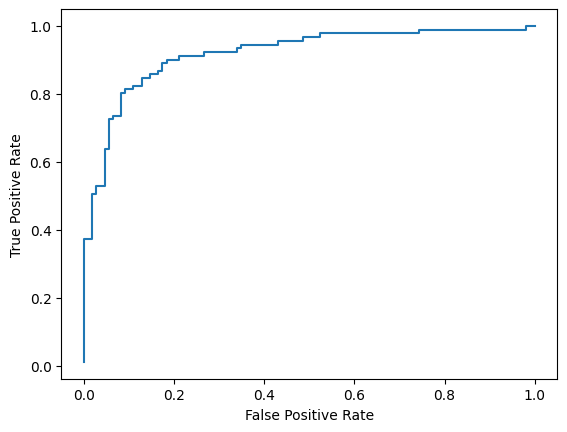

In [ ]:
def roc_curve(y_true, y_score):
    """
    Calculates the receiver operating characteristic (ROC) curve
    :param y_true: True labels
    :param y_score: Model score/probability for the positive class
    thresholds (list): thresholds used for decision making
    :return: False Positive Rate (FPR), True Positive Rate (TPR) as np.arrays
    """

    y_true = np.array(y_true)
    y_score = np.array(y_score)
    thresholds = np.unique(y_score)[::-1]  # reverse: from high threshold to low
    fpr = []
    tpr = []


    for threshold in thresholds:
        # TODO
      y_pred = (y_score >= threshold)
      cm = confusion_matrix(y_true, y_pred)
      [[tp, fn], [fp, tn]] = cm  # use if desired

      fpr.append(fp / (fp + tn))
      tpr.append(tp / (tp + fn))

    fpr = np.array(fpr)  # convert to numpy
    tpr = np.array(tpr)
    return fpr, tpr, thresholds

# Compute false positive rate and true positive rate
fpr, tpr, th = roc_curve(y_test, y_score)

# Plot ROC curve
#if ... in fpr or ... in tpr:
print("Thresholds:", th[:5])
print("False positive rate:", fpr[:5])
print("True positive rate:", tpr[:5])
#else:
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### AUC Score
The *Area Under the Curve* (AUC) of the ROC curve is a useful metric in describing the power of the model.
The area under a curve can be calculated with the `numpy.trapz` function:
```python
area = np.trapz(y, x)
```

As described above, an optimal classifier exists at the point (0,1), thus the area under the ROC curve is 1.
Similarly an uninformative classifier on the line from (0,0) to (1,1) will give a maximum AUC of 0.5.

---
> Complete the function to calculate the ROC AUC metric.

In [ ]:
def roc_auc_score(y_true, y_score):
    # TODO

    fpr = []
    tpr = []

    fpr, tpr, th = roc_curve(y_true, y_score)

    fpr = np.array(fpr)  # convert to numpy
    tpr = np.array(tpr)

    auc = np.trapz(tpr, fpr)
    return auc

# Compute AUC score
auc = roc_auc_score(y_test, y_pred)
print("AUC score: ", auc)

AUC score:  0.6645905226832758
